In [216]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [217]:
iris = load_iris()
X = iris.data
y = iris.target

In [218]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [219]:
cov_matrix = np.cov(X_scaled.T)

In [220]:

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]


DLA WYMIARU=1

Text(0.5, 1.0, '1-wymiarowy wykres przed redukcją wymiarowości')

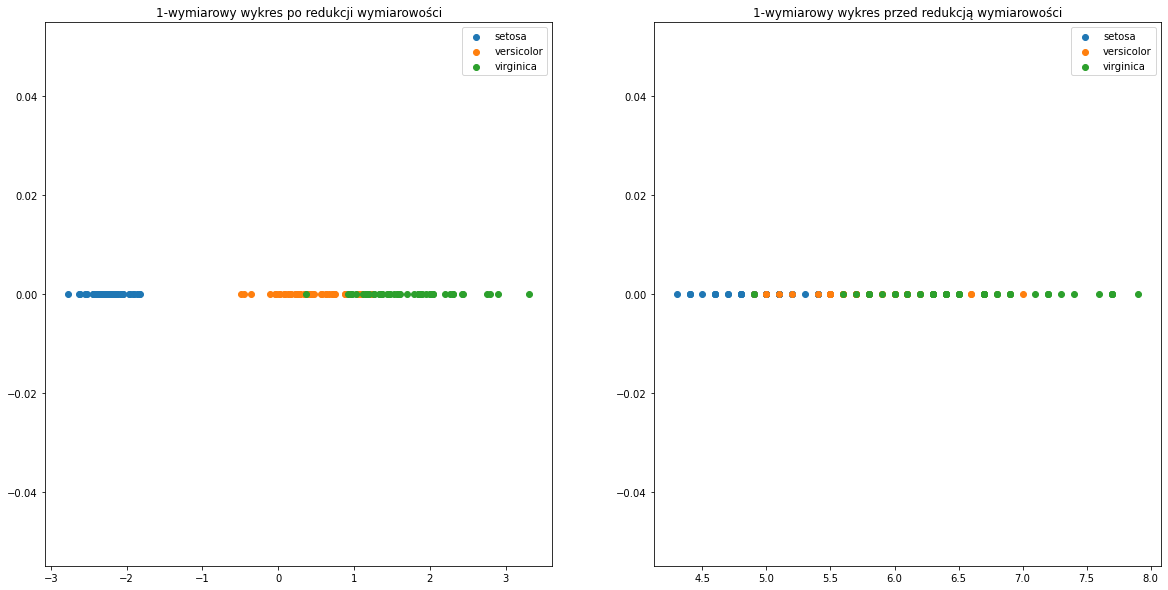

In [221]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
n_dimensions = 1 
selected_eigen_values = sorted_eigen_values[:n_dimensions]
selected_eigen_vectors = sorted_eigen_vectors[:, :n_dimensions]
labels = y
unique_labels = np.unique(labels)
reduced_data = X_scaled.dot(selected_eigen_vectors)
for label in unique_labels:
    group_indices = np.where(label==labels)
    ax1.scatter(reduced_data[group_indices],np.zeros(reduced_data[group_indices].shape[0]), label=label)
label_names = ['setosa', 'versicolor', 'virginica']
ax1.legend(label_names)
ax1.set_title("1-wymiarowy wykres po redukcji wymiarowości")

selected_data = X[:,0]
for label in unique_labels:
    group_indices = np.where(label==labels)
    ax2.scatter(selected_data[group_indices],np.zeros(selected_data[group_indices].shape[0]), label=label)
label_names = ['setosa', 'versicolor', 'virginica']
ax2.legend(label_names)
ax2.set_title("1-wymiarowy wykres przed redukcją wymiarowości")


DLA WYMIARU=2

Text(0.5, 1.0, '1-wymiarowy wykres przed redukcją wymiarowości')

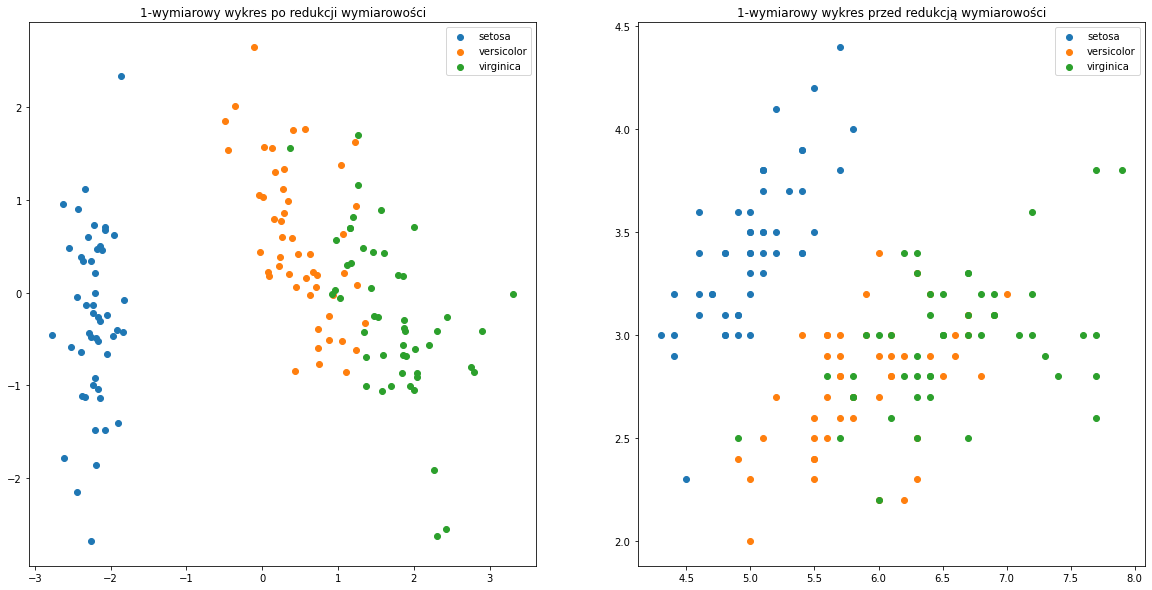

In [222]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
n_dimensions = 2
selected_eigen_values = sorted_eigen_values[:n_dimensions]
selected_eigen_vectors = sorted_eigen_vectors[:, :n_dimensions]
labels = y
unique_labels = np.unique(labels)
reduced_data = X_scaled.dot(selected_eigen_vectors)
for label in unique_labels:
    group_indices = np.where(label==labels)
    ax1.scatter(reduced_data[group_indices,0],reduced_data[group_indices,1], label=label)
label_names = ['setosa', 'versicolor', 'virginica']
ax1.legend(label_names)
ax1.set_title("1-wymiarowy wykres po redukcji wymiarowości")

selected_data = X[:,[0,1]]
for label in unique_labels:
    group_indices = np.where(label==labels)
    ax2.scatter(selected_data[group_indices,0],selected_data[group_indices,1], label=label)
label_names = ['setosa', 'versicolor', 'virginica']
ax2.legend(label_names)
ax2.set_title("1-wymiarowy wykres przed redukcją wymiarowości")


DLA WYMIARU=3

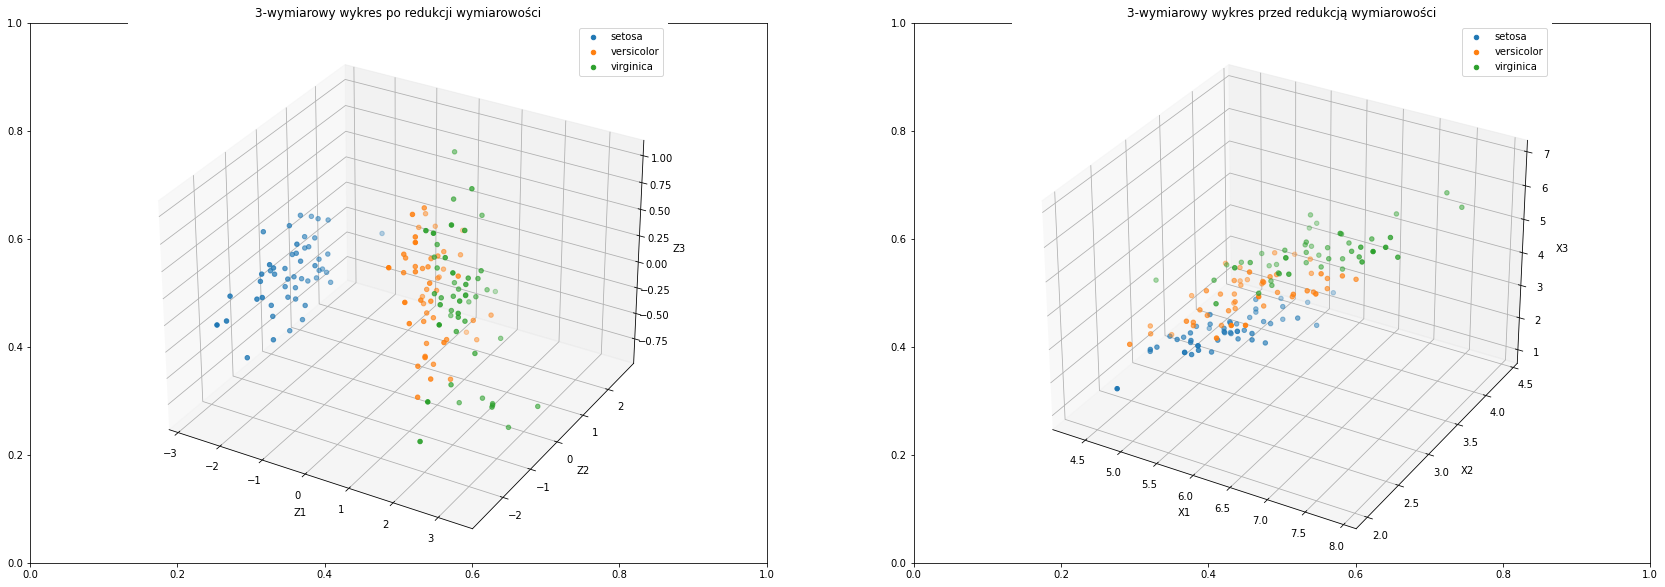

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
n_dimensions = 3 
selected_eigen_values = sorted_eigen_values[:n_dimensions]
selected_eigen_vectors = sorted_eigen_vectors[:, :n_dimensions]
labels = y
unique_labels = np.unique(labels)



reduced_data = X_scaled.dot(selected_eigen_vectors)
ax1 = fig.add_subplot(121, projection='3d')
for label in unique_labels:
        group_indices = np.where(labels == label)[0]
        ax1.scatter(
            reduced_data[group_indices, 0],
            reduced_data[group_indices, 1],
            reduced_data[group_indices, 2],
            label=label
        )
ax1.set_xlabel('Z1')
ax1.set_ylabel('Z2')
ax1.set_zlabel('Z3')
ax1.set_title('3-wymiarowy wykres po redukcji wymiarowości')

label_names = ['setosa', 'versicolor', 'virginica']
ax1.legend(label_names)



selected_data = X
ax2 = fig.add_subplot(122, projection='3d')

for label in unique_labels:
        group_indices = np.where(labels == label)[0]
        ax2.scatter(
            selected_data[group_indices, 0],
            selected_data[group_indices, 1],
            selected_data[group_indices, 2],
            label=label
        )
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')
ax2.set_title('3-wymiarowy wykres przed redukcją wymiarowości')
ax2.legend(label_names)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95, wspace=0.2)
plt.show()


TASK2

In [224]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [226]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [227]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [228]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [229]:
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3','V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [230]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


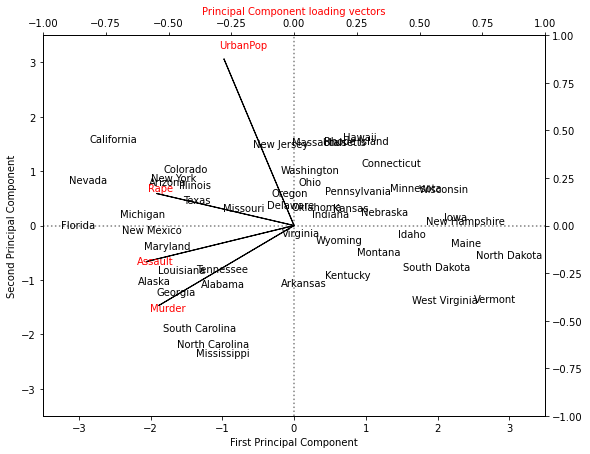

In [231]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and ta = 1.07
a=1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [232]:
pca.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [233]:
pca.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x19e0e75e7c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

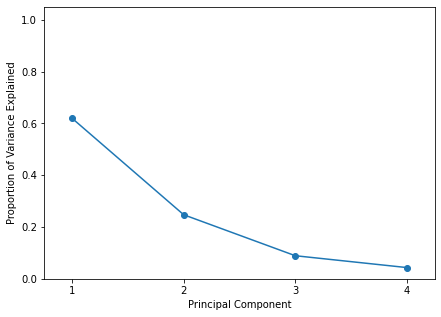

In [234]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])


([<matplotlib.axis.XTick at 0x19e0e7acb20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

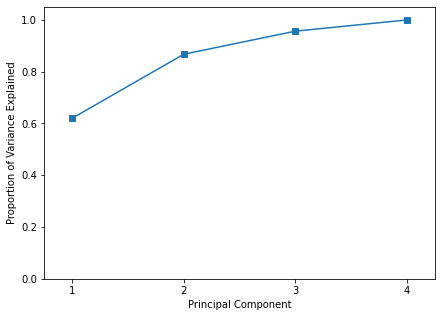

In [235]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

NCI60 Data Example

In [236]:
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [237]:
y = pd.read_csv('NCI60.csv', usecols=[1], skiprows=1, names=['type'])

PCA on the NCI60 Data

In [238]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

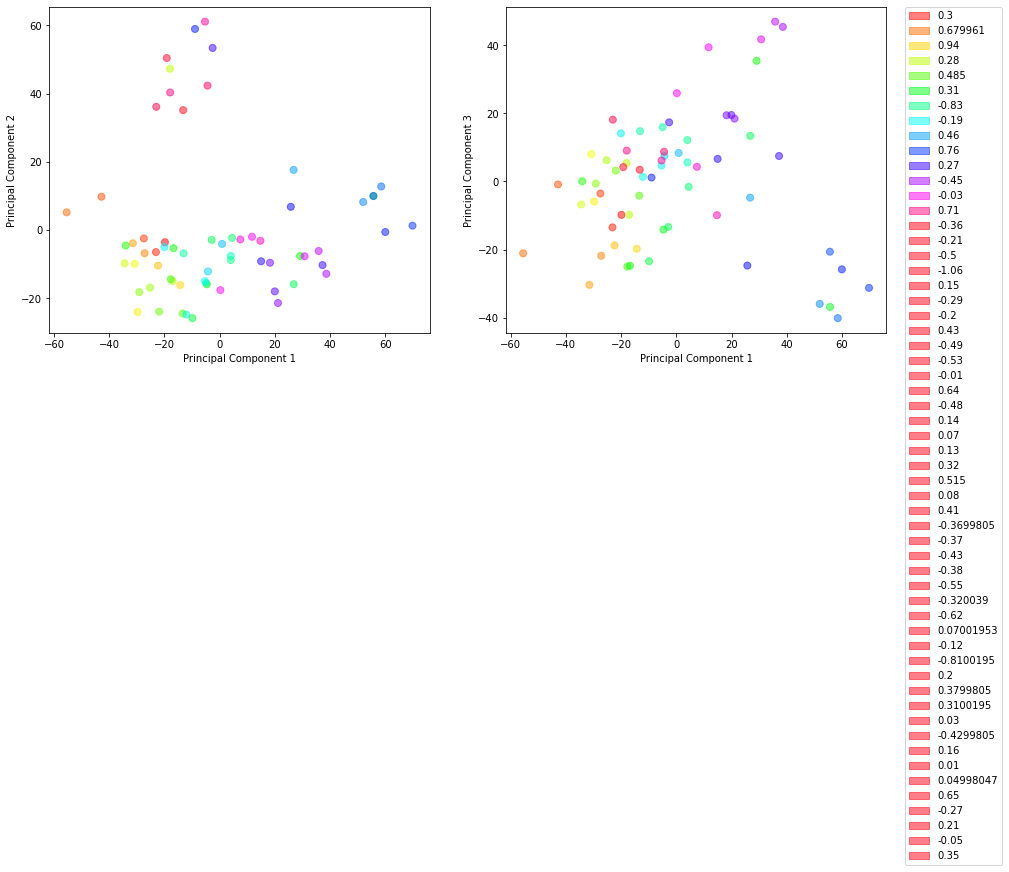

In [240]:
import matplotlib as mpl
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
    
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [243]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

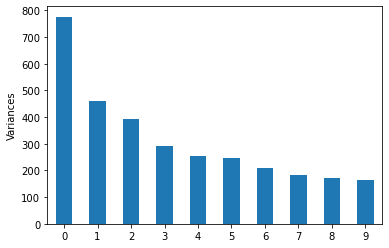

In [244]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

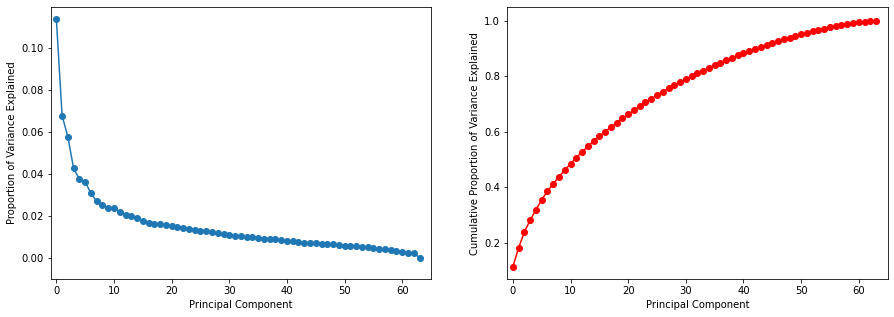

In [245]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)